In [28]:
import numpy as np # linear algebra

In [29]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [30]:
from sklearn.decomposition import PCA # Principal Component Analysis module

In [31]:
from sklearn.cluster import KMeans # KMeans clustering 

In [32]:
import matplotlib.pyplot as plt # Python defacto plotting library

In [33]:
import seaborn as sns # More snazzy plotting library

In [34]:
%matplotlib inline 

In [35]:
starCraft_df = pd.read_csv("sc2_dataset_lt_5mins.csv")

Analysons cet ensemble de données. Texte ou numérique ? Proportion de données manquantes ?
Que faire des données manquantes ? Supprimer les colonnes, les remplacer par des zeros, ou la médiane ?


In [36]:
# 328 colonnes
starCraft_df.head()

,_p1_win_game,game_length,p1_APM,p1_APM_wo_select,p1_Archon,p1_Armory,p1_Assimilator,p1_Auto_Turret,p1_Baneling_Nest,p1_Banshee,...,p2_min_distance_from_opponent,p2_nb_scooting,p2_selected_hotkeys,p2_spent_gas,p2_spent_minerals,p2_timing_1st_scooting,p2_to_Orbital_Command_Command_Center,p2_to_Planetary_Fortress_Command_Center,p2_to_Warp_Gate_Gateway,p2_unit_types
0,0,505.525072,253.755960,117.501591,NaN,NaN,NaN,NaN,NaN,NaN,...,1.326082,126,650,125,5625,45.788680,NaN,NaN,NaN,5
1,1,808.316816,409.814560,184.973045,NaN,NaN,NaN,NaN,1.0,NaN,...,2.195000,34,847,5775,26000,117.381424,3.0,NaN,NaN,7
2,1,615.327680,119.058515,50.509673,NaN,NaN,NaN,NaN,1.0,NaN,...,0.701632,124,2,1200,7275,475.345144,NaN,NaN,1.0,3
3,1,447.150144,283.797292,108.285775,NaN,NaN,2.0,NaN,NaN,NaN,...,109.445248,0,83,0,10100,NaN,2.0,NaN,NaN,2
4,1,693.732336,110.532544,56.996046,NaN,NaN,NaN,NaN,NaN,NaN,...,1.357620,62,24,3350,12550,631.703336,NaN,NaN,NaN,4


In [37]:
starCraft_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34534 entries, 0 to 34533
Data columns (total 328 columns):
_p1_win_game                                    34534 non-null int64
game_length                                     34534 non-null float64
p1_APM                                          34534 non-null float64
p1_APM_wo_select                                34534 non-null float64
p1_Archon                                       4 non-null float64
p1_Armory                                       6465 non-null float64
p1_Assimilator                                  11096 non-null float64
p1_Auto_Turret                                  473 non-null float64
p1_Baneling_Nest                                5997 non-null float64
p1_Banshee                                      2340 non-null float64
p1_Barracks                                     10861 non-null float64
p1_Battlecruiser                                316 non-null float64
p1_Building_Attack                              110

In [38]:
# Check columns format : String or numeric
str_list = [] 
for colname, colvalue in starCraft_df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = starCraft_df.columns.difference(str_list)  
len(num_list)
# Only numeric values

328

In [39]:
starCraft_df.columns.values


array(['_p1_win_game', 'game_length', 'p1_APM', 'p1_APM_wo_select',
       'p1_Archon', 'p1_Armory', 'p1_Assimilator', 'p1_Auto_Turret',
       'p1_Baneling_Nest', 'p1_Banshee', 'p1_Barracks', 'p1_Battlecruiser',
       'p1_Building_Attack', 'p1_Bunker', 'p1_Carrier', 'p1_Colossus',
       'p1_Command_Center', 'p1_Corruptor', 'p1_Creep_Tumor',
       'p1_Cybernetics_Core', 'p1_Dark', 'p1_Dark_Shrine', 'p1_Drone',
       'p1_Engineering_Bay', 'p1_Evolution_Chamber', 'p1_Extractor',
       'p1_Factory', 'p1_Fleet_Beacon', 'p1_Forge', 'p1_Fusion_Core',
       'p1_Gateway', 'p1_Ghost', 'p1_Ghost_Academy', 'p1_Hatchery',
       'p1_Hellion', 'p1_High', 'p1_Hive', 'p1_Hydralisk',
       'p1_Hydralisk_Den', 'p1_Immortal', 'p1_Infestation_Pit',
       'p1_Infestor', 'p1_Lair', 'p1_Lair_Upgrade_Hatchery', 'p1_Marauder',
       'p1_Marine', 'p1_Medivac', 'p1_Missile_Turret', 'p1_Mothership',
       'p1_Mutalisk', 'p1_Nexus', 'p1_Nydus_Network', 'p1_Nydus_Worm',
       'p1_Observer', 'p1_Orbital_

## Proportion of NaN values ?


In [40]:
def countNaNValues (df):
    """
    Return a list with the number of NaN values in each column 
    """
    
    # List of all features
    df_list = df.columns.values.tolist()
    NaN_list = []
    for feature in df_list:
        NaN_list.append(df[feature].isnull().sum().sum())
    
    return NaN_list



def countNaNRate(df, colName) :
    """
    Return a list of 10 items
    with how many columns have more than 0 to 90 %
    of NaN values
    
    """
    
    NaN_list = countNaNValues(df)
    NaN_rate =[]
    df_list = df.columns.values.tolist()
    
    for j in range(10):
        count = 0
        for i in range(len(df_list)):
            if (NaN_list[i]>0.1*j*len(df[colName])):
                count +=1  
        NaN_rate.append(count)
    return NaN_rate

 
    
    


In [41]:
NaN_rate = countNaNRate(starCraft_df, "_p1_win_game")
NaN_rate
# 216/328 columns with more than 80 % NaN values
# 32/328 columns with less than 10 % NaN values 
 

[304, 296, 296, 296, 296, 296, 296, 255, 216, 157]

In [42]:
# Light dataset :  only these 32 columns    
NaN_list = countNaNValues(starCraft_df)
starCraft_list = starCraft_df.columns.values.tolist()
toErase = []
for i in range(len(starCraft_list)):
    # 90 % of non NaN values 
    if (NaN_list[i]>0.1*len(starCraft_df._p1_win_game)):
        toErase.append(starCraft_list[i])
        
starCraft_df_light = starCraft_df.drop(toErase, axis=1)
len(starCraft_df_light.columns)

32

In [43]:
# Change NaN values to zero (more meaning than median)
starCraft_df = starCraft_df.fillna(value=0, axis=1) #(328 columns)
starCraft_df_light = starCraft_df_light.fillna(value=0, axis=1) #(32 columns)

Standardization : peut être placé plus tard


In [46]:
# As columns are the same for most of the columns, decrease columns number by feature = p1_feature - p2_feature  

colnames = [starCraft_df.columns.values, starCraft_df_light.columns.values]

# sub_lists for each player 
for index, value in enumerate(colnames) :
# $ regular expression : select only lines ending by name[2:]  (case of pi_APM_wo_select)
    p1_colnames = [name for name in value if "p1" in name]
    p1_colnames = [name[2:]+'$' for name in p1_colnames ]
    p2_colnames = [name for name in value if "p2" in name]
    p2_colnames = [name[2:]+'$' for name in p2_colnames ]
    colnames[index] = [name for name in p1_colnames if name in p2_colnames ]

print len(colnames[0])
print len(colnames[1])
# X1 : 163 dimensions
# X2 :  15 dimensions

163
15


In [47]:
# new DataFrames : p1-p2 for each column
p1p2_163_df = pd.DataFrame()
p1p2_15_df = pd.DataFrame()

for name in colnames[0]:
    filt_df = starCraft_df.filter(regex=name)
    print filt_df
    # For each line execpt the first, difference between p1 and p2 data
    p1p2_163_df[name[:-1]] = filt_df.iloc[:,0]-filt_df.iloc[:,1]
for name in colnames[1]:
    filt_df = starCraft_df_light.filter(regex=name)
    # For each line execpt the first, difference between p1 and p2 data
    p1p2_15_df[name[:-1]] = filt_df.iloc[:,0]-filt_df.iloc[:,1] 
print p1p2_163_df
print p1p2_15_df

           p1_APM      p2_APM
0      253.755960  306.270928
1      409.814560  362.382878
2      119.058515  274.390387
3      283.797292  146.886867
4      110.532544  142.069858
5      337.429122  290.999895
6      369.146005  292.974941
7      229.294602  249.723143
8      237.874831  187.064207
9      252.864025  288.047779
10     244.945080  197.167049
11     283.576993  140.934778
12     288.761183  243.772324
13     233.896861  324.099615
14     236.956047  195.630840
15     123.225203  254.807257
16     268.707693  381.301717
17     325.174347  367.593290
18     226.393565  243.345597
19     145.712939  346.082767
20     223.987536  172.360888
21     293.951209  162.084578
22     421.439820  278.362226
23     141.301389  208.697541
24     196.366230  173.970852
25     229.817636  366.030899
26     201.647372  204.363566
27     173.219546  224.801399
28     223.630543  245.068541
29     276.425625  239.362405
...           ...         ...
34504  132.603655  106.057420
34505  274

In [48]:
X1 = p1p2_163_df
X2 = p1p2_15_df

# Data Normalization
from sklearn.preprocessing import StandardScaler
X1_std = StandardScaler().fit_transform(X1)
X2_std = StandardScaler().fit_transform(X2)

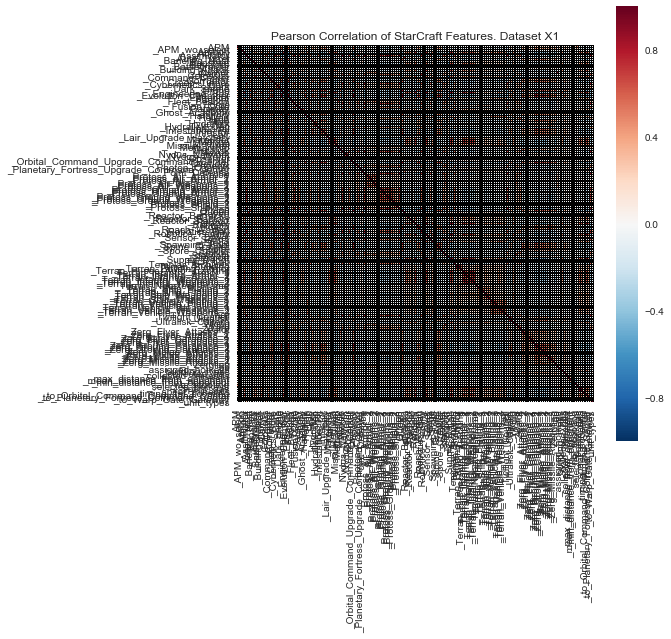

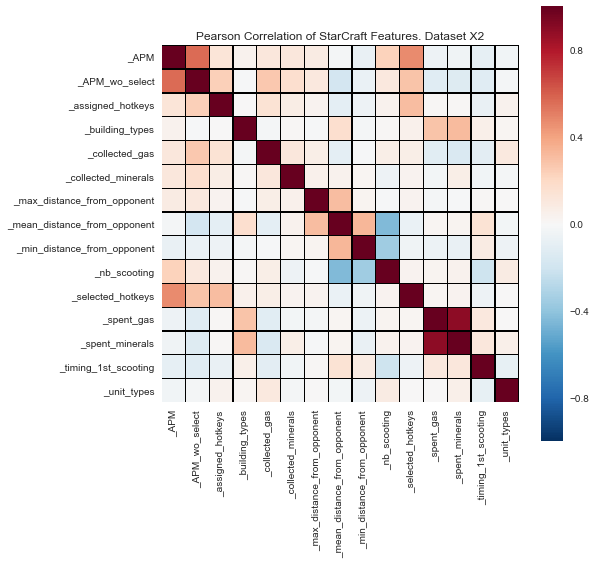

In [49]:
# X1

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
plt.title('Pearson Correlation of StarCraft Features. Dataset X1')
# Draw the heatmap using seaborn
sns.heatmap(X1.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, linecolor='black')


#X2

# Set up the matplotlib figure
g, ax2 = plt.subplots(figsize=(8, 8))
plt.title('Pearson Correlation of StarCraft Features. Dataset X2')
# Draw the heatmap using seaborn
sns.heatmap(X2.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, linecolor='black')




Assez peu de corrélation. Deux jeux semblent equivalents. On garde celui avec les médianes

Analyse PCA : principal component analysis, et en amont, choix du nombre de composantes à conserver via Explained Variance

In [50]:
# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X1_std, axis=0)
cov_mat = np.cov(X1_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [51]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

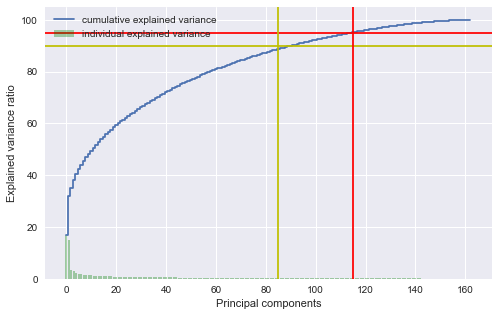

In [53]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(8, 5))
plt.bar(range(163), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(163), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.axhline(y=90,color='y')
plt.axhline(y=95,color='r')
plt.axvline(x=85,color='y')
plt.axvline(x=115,color='r')
plt.legend(loc='best')
plt.show()
# 90 % of information described by 85/163 features
# 95 % of information described by 115/163 features

PCA on 24 most important features

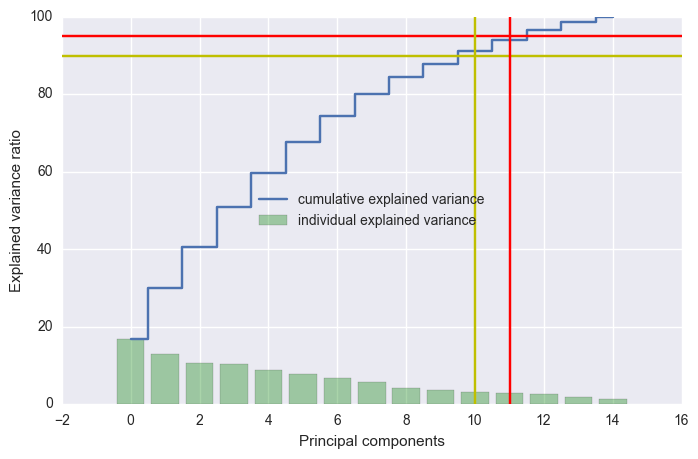

In [17]:
# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X2_std, axis=0)
cov_mat = np.cov(X2_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance


# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(8, 5))
plt.bar(range(15), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(15), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.axhline(y=90,color='y')
plt.axhline(y=95,color='r')
plt.axvline(x=10,color='y')
plt.axvline(x=11,color='r')
plt.legend(loc='best')
plt.show()
# 90 % of information described by 10/15 features
# 95 % of information described by 11/15 features

In [18]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=10)
x_10d = pca.fit_transform(X2_std)

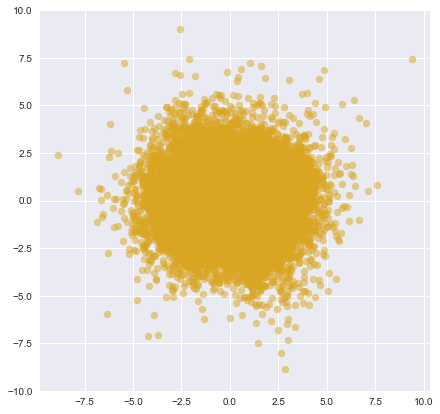

In [19]:
# Two first projections
plt.figure(figsize = (7,7))
plt.scatter(x_10d[:,0],x_10d[:,1], c='goldenrod',alpha=0.5)
plt.ylim(-10,10)
plt.show()

Visualization with KMEANS clustering 

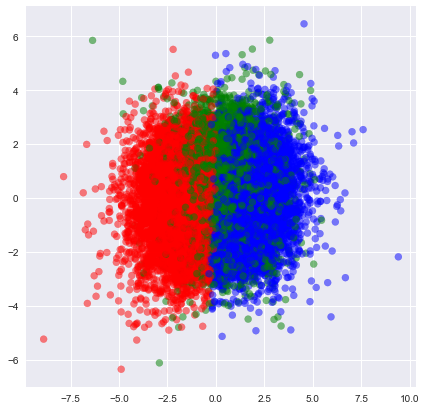

In [20]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_10d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_10d[:,0],x_10d[:,2], c= label_color, alpha=0.5) 
plt.show()

A COMPLETER

APPRENTISSAGE SUPERVISE : sklearn

Etape 1 : Extract the target variable
La cible à prédire est le vainqueur du match indiqué dans la variable _p1_win_game.

In [54]:
# tableau des victoires/defaites du joueur p1
# y = resultats
y = starCraft_df._p1_win_game.as_matrix()
#X1 = X1_std.iloc[:,:].as_matrix()

In [19]:
##### Test de l'algo sur petit jeu de données pour comprendre pourquoi il calle une précision de 100 % à chaque coup


# on prend 1/50 du jeu d'entrainement, arrondi à l'unite
small_train_index = round(len(X2_std)/10)
small_train_index
# Les nouveaux X et y pour ce jeu restreint 
# les algorithmes de sklearn prennent des np.array en entrée
#y = y[:int(small_train_index)]
#X1_std = X1_std[:int(small_train_index),:]
#print("X length = %d and y length = %d" % (len(X1_std), len(y)))

3457.0

Split les jeux de données (jeu de training (80%) et testing (20%))

In [55]:
from sklearn.preprocessing import StandardScaler
# Certains algo sont moins performants si le jeu de données n'est pas centré sur zero,
# avec une distribution de type gaussienne, ou avec des bornes [0:1] 
stdsc = StandardScaler()
# calcule la moyenne des données puis lui applique un facteur d'échelle
X_std = stdsc.fit_transform(X2_std)


# old cross_validation module becomes new model_selection module
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1_std, y, test_size=0.2)
X_train

array([[  6.23716029e-01,   6.29003646e-01,  -4.89197157e-04, ...,
          4.64707482e-03,   1.04454368e-02,   6.42448680e-01],
       [ -1.01404207e+00,   3.95661348e-01,  -4.89197157e-04, ...,
          4.64707482e-03,   1.04454368e-02,  -6.13428299e-01],
       [  1.16408312e+00,  -1.54680667e-01,  -4.89197157e-04, ...,
          4.64707482e-03,   2.02941585e+00,   1.45101904e-02],
       ..., 
       [  1.12165092e+00,   3.09883581e-02,  -4.89197157e-04, ...,
         -1.28956326e+00,   2.02941585e+00,   6.42448680e-01],
       [  4.11214244e-01,   3.21733284e-01,  -4.89197157e-04, ...,
          4.64707482e-03,   1.04454368e-02,   1.45101904e-02],
       [  1.34913322e+00,   1.46860296e-01,  -4.89197157e-04, ...,
          4.64707482e-03,   1.04454368e-02,  -1.24136679e+00]])

cross validation : certains modèles possèdent des hyperparamètres. Un biais de l'apprentissage consiste à ajuster ces hyperparamètres sur le jeu de test jusqu'à ce que le modèle fit parfaitement les données. On risque alors l'overfitting. Il est possible de vérifier ce biais en attribuant une partie du jeu de données à un jeu de validation. Le problème est de limiter du même coup la taille restante aux jeux de train/test.

Entre en jeu la méthode de cross validation qui découpe le jeu de données en K-fold, K-1 parts for training set and the last for test set, with a loop on the choice of the test set. Model accuracy is an average of all the iteration in the loop 

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X1_std, y, cv=2)
scores     

In [ ]:
scores.mean()

Les modeles :
1 : regression logistique, comme ligne de base
2 : SVM ou tree ensembles
SVM : alternative à la LR si dependance non lineaire des features. Difficile a entrainer. Efficace sur hautes dimensions
3 : tree ensembles :  Random Forests (Algorithm) and Gradient Boosted Trees. Fonctionnent bien sur categories binaires
et ne nécessite pas de séparation lineaire


Regression Logistique


In [57]:
# Import de toute une serie d'estimateurs ?
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import average_precision_score
#import xgboost
# une methode pour evaluer la precision des modeles
def accuracy(y_true,y_pred):
    # NumPy interpretes True and False as 1. and 0.
    return np.mean(y_true == y_pred)


In [25]:
# Logistic Regression

y_LR_pred=[]
# Set regularization parameter
for i, C in enumerate((100, 1, 0.01)):
    # turn down tolerance for short training time
    clf_l0_LR = LR()
    clf_l1_LR = LR(C=C, penalty='l1', tol=0.01)
    clf_l2_LR = LR(C=C, penalty='l2', tol=0.01)
    clf_l0_LR.fit(X_train, y_train)
    clf_l1_LR.fit(X_train, y_train)
    clf_l2_LR.fit(X_train, y_train)
    y_LR_pred.append(clf_l0_LR.predict(X_test))
    y_LR_pred.append(clf_l1_LR.predict(X_test))
    y_LR_pred.append(clf_l2_LR.predict(X_test))
acc_LR=[]
for y_pred in y_LR_pred:
    acc_LR.append(accuracy(y_test, y_pred))
acc_LR.index(max(acc_LR))
# meilleur jeu = LR(C=0.01, penalty='l1', tol=0.01)

1

In [31]:
# RandomForestClassifier


In [32]:
acc_RF=[]
for n in range (10, 200, 5 ):
    clf_RF = RF(n_estimators=n)
    clf_RF.fit(X_train, y_train)
    y_pred = clf_RF.predict(X_test)
    acc_RF.append(accuracy(y_test, y_pred))

    
    
    
    
    
    

[0.5322440717177559,
 0.54612492770387511,
 0.55002891844997104,
 0.55639097744360899,
 0.54670329670329665,
 0.54858299595141702,
 0.55480046269519956,
 0.55855986119144019,
 0.55537883169462121,
 0.55248698669751306,
 0.55465587044534415,
 0.56535569693464427,
 0.55624638519375358,
 0.55566801619433204,
 0.56304222093695777,
 0.55812608444187395,
 0.55349913244650084,
 0.56159629843840375,
 0.56058415268941586,
 0.57186234817813764,
 0.56694621168305381,
 0.5714285714285714,
 0.56969346443030655,
 0.56087333718912669,
 0.56709080393290923,
 0.55942741469057256,
 0.56116252168883751,
 0.5656448814343551,
 0.55855986119144019,
 0.56622325043377675,
 0.56521110468478886,
 0.56188548293811447,
 0.5644881434355119,
 0.56607865818392133,
 0.56477732793522262,
 0.5610179294389821,
 0.55971659919028338,
 0.56651243493348757]

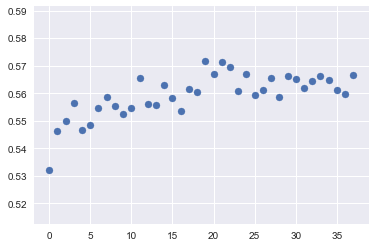

In [33]:
index_RF = range(len(acc_RF))
plt.scatter(index_RF, acc_RF)


In [26]:
# Gradient Boosting Classifier


In [31]:
# Import de toute une serie d'estimateurs ?
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import average_precision_score
from xgboost import XGBClassifier as XGB




# une methode pour evaluer la precision des modeles
def accuracy(y_true,y_pred):
    # NumPy interpretes True and False as 1. and 0.
    return np.mean(y_true == y_pred)

In [58]:
#KFold : pour diviser les données 
from sklearn.cross_validation import KFold

#** arguments sous la forme de dico
#X : les donnees
#y : les resultats
#clf_class : un type de classifier : par exemple l'estimateur SVC

def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    #KFold : len(y)?
    # nombre de portions:3, et regroupement des données identiques avant decoupage
    kf = KFold(len(y),n_folds=3,shuffle=True)
    # copie la DataFrame des resultats
    y_pred = y.copy()
    
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # un classifier est un exemple d'estimator, un objet python qui implemente les 
        # methodes .fit(X,y) et predict(T) 
        # Initialize a classifier with keyword arguments
        clf = clf_class(**kwargs)
        # le classifier apprend du modele grace au jeu d'entrainement
        clf.fit(X_train,y_train)
        # puis predit de nouvelles valeurs via le jeu de test
        y_pred[test_index] = clf.predict(X_test)
    return y_pred
# la fonction renvoie les resultats prédits pour le jeu de test (prochaine etape : evaluer l'erreur de la prediction)

C:\Users\thaunayf\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [60]:
# Test des differents modeles
# Plus grande precision : Logistic Regression LR
print "Logistic Regression:"
print "%.3f" % accuracy(y, run_cv(X2_std,y,LR))
print "Gradient Boosting Classifier"
print "%.3f" % accuracy(y, run_cv(X2_std,y,GBC))
#print "XGB Classifier"
#print "%.3f" % accuracy(y, run_cv(X2_std,y,XGB))
print "Support vector machines:"
print "%.3f" % accuracy(y, run_cv(X2_std,y,SVC))
print "Random forest:"
print "%.3f" % accuracy(y, run_cv(X2_std,y,RF))
print "K-nearest-neighbors:"
print "%.3f" % accuracy(y, run_cv(X2_std,y,KNN))

Logistic Regression:
0.676
Gradient Boosting Classifier
0.689
Support vector machines:
0.686
Random forest:
0.652
K-nearest-neighbors:
0.626


In [61]:
# Test des differents modeles
# Plus grande precision : Logistic Regression LR
print "Logistic Regression:"
print "%.3f" % accuracy(y, run_cv(X1_std,y,LR))
print "Gradient Boosting Classifier"
print "%.3f" % accuracy(y, run_cv(X1_std,y,GBC))
#print "XGB Classifier"
print "%.3f" % accuracy(y, run_cv(X1_std,y,XGB))
print "Support vector machines:"
print "%.3f" % accuracy(y, run_cv(X1_std,y,SVC))
print "Random forest:"
print "%.3f" % accuracy(y, run_cv(X1_std,y,RF))
print "K-nearest-neighbors:"
print "%.3f" % accuracy(y, run_cv(X1_std,y,KNN))

Logistic Regression:
0.750
Gradient Boosting Classifier
0.718


NameError: name 'XGB' is not defined

In [37]:
# rajouter deux infos :
# - le nombre d'unités
# - la race du joueur
features = starCraft_df.columns.values.tolist()

features

['_p1_win_game',
 'game_length',
 'p1_APM',
 'p1_APM_wo_select',
 'p1_Armory',
 'p1_Assimilator',
 'p1_Auto_Turret',
 'p1_Baneling_Nest',
 'p1_Banshee',
 'p1_Barracks',
 'p1_Battlecruiser',
 'p1_Building_Attack',
 'p1_Bunker',
 'p1_Carrier',
 'p1_Colossus',
 'p1_Command_Center',
 'p1_Creep_Tumor',
 'p1_Cybernetics_Core',
 'p1_Dark',
 'p1_Dark_Shrine',
 'p1_Drone',
 'p1_Engineering_Bay',
 'p1_Evolution_Chamber',
 'p1_Extractor',
 'p1_Factory',
 'p1_Fleet_Beacon',
 'p1_Forge',
 'p1_Fusion_Core',
 'p1_Gateway',
 'p1_Ghost',
 'p1_Ghost_Academy',
 'p1_Hatchery',
 'p1_Hellion',
 'p1_Hive',
 'p1_Hydralisk_Den',
 'p1_Immortal',
 'p1_Infestation_Pit',
 'p1_Infestor',
 'p1_Lair',
 'p1_Lair_Upgrade_Hatchery',
 'p1_Marauder',
 'p1_Marine',
 'p1_Medivac',
 'p1_Missile_Turret',
 'p1_Mothership',
 'p1_Mutalisk',
 'p1_Nexus',
 'p1_Nydus_Network',
 'p1_Nydus_Worm',
 'p1_Observer',
 'p1_Orbital_Command_Upgrade_Command_Center',
 'p1_Overlord',
 'p1_Phoenix',
 'p1_Photon_Cannon',
 'p1_Probe',
 'p1_Protoss

In [38]:
unitsAndBuildP1 = features[4:105]
unitsAndBuildP2 = features[123:224]
unitsAndBuildP1_df = pd.DataFrame()
unitsAndBuildP2_df = pd.DataFrame()

#for name in unitsAndBuildP1:
unitsAndBuildP1_df = starCraft_df.filter(items=unitsAndBuildP1)
unitsAndBuildP2_df = starCraft_df.filter(items=unitsAndBuildP2)   
unitsAndBuildP1_df

,p1_Armory,p1_Assimilator,p1_Auto_Turret,p1_Baneling_Nest,p1_Banshee,p1_Barracks,p1_Battlecruiser,p1_Building_Attack,p1_Bunker,p1_Carrier,...,p1_Twilight_Council,p1_Viking,p1_Void,p1_Warp,p1_Zealot,p1_Zerg_Flyer_Attacks_1,p1_Zerg_Ground_Carapace_1,p1_Zerg_Melee_Attacks_1,p1_Zerg_Missile_Attacks_1,p1_Zergling
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
7,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [39]:
p1isTerran, p1isZerg, p1isProtoss, p2isTerran, p2isZerg, p2isProtoss  = [], [], [], [], [], []
p1UnitsAndBuildings, p2UnitsAndBuildings = [], []

for row in range(len(starCraft_df)):
    if (starCraft_df['p1_SCV'][row] > 0):
        p1isTerran.append(1)
    else :
        p1isTerran.append(0)
        
    if (starCraft_df['p2_SCV'][row] > 0):
        p2isTerran.append(1)
    else :
        p2isTerran.append(0)   
        
    if (starCraft_df['p1_Drone'][row] > 0):
        p1isZerg.append(1)
    else :
        p1isZerg.append(0)
        
    if (starCraft_df['p2_Drone'][row] > 0):
        p2isZerg.append(1)
    else :
        p2isZerg.append(0)      
        
    if (starCraft_df['p1_Probe'][row] > 0):
        p1isProtoss.append(1)
    else :
        p1isProtoss.append(0)   
        
    if (starCraft_df['p2_Probe'][row] > 0):
        p2isProtoss.append(1)
    else :
        p2isProtoss.append(0)     

    
  
starCraft_df['p1isTerran'] = p1isTerran
starCraft_df['p2isTerran'] = p2isTerran
starCraft_df['p1isZerg'] = p1isZerg
starCraft_df['p2isZerg'] = p2isZerg
starCraft_df['p1isProtoss'] = p1isProtoss
starCraft_df['p2isProtoss'] = p2isProtoss
starCraft_df['p1UnitsAndBuildings'] = unitsAndBuildP1_df.sum(axis=1)
starCraft_df['p2UnitsAndBuildings'] = unitsAndBuildP2_df.sum(axis=1)


In [40]:
starCraft_df

,_p1_win_game,game_length,p1_APM,p1_APM_wo_select,p1_Armory,p1_Assimilator,p1_Auto_Turret,p1_Baneling_Nest,p1_Banshee,p1_Barracks,...,p2_to_Warp_Gate_Gateway,p2_unit_types,p1isTerran,p2isTerran,p1isZerg,p2isZerg,p1isProtoss,p2isProtoss,p1UnitsAndBuildings,p2UnitsAndBuildings
0,0,299.588792,198.472044,99.135885,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4,0,0,1,1,0,0,61.0,53.0
1,1,299.949688,352.059043,137.623080,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3,0,1,1,0,0,0,80.0,49.0
2,1,297.694088,81.627419,42.929976,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,2,0,0,1,0,0,1,40.0,33.0
3,1,299.859464,269.726354,108.597845,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,2,0,1,0,0,1,0,52.0,61.0
4,1,299.724128,94.486888,47.443628,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2,0,0,1,0,0,1,46.0,40.0
5,1,299.859464,189.888954,78.779060,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,4,0,1,1,0,0,0,67.0,54.0
6,0,299.949688,305.851293,131.261490,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,4,0,1,1,0,0,0,42.0,47.0
7,0,299.949688,118.419860,50.008387,0.0,2.0,0.0,0.0,0.0,0.0,...,2.0,4,0,0,0,0,1,1,48.0,36.0
8,1,299.182784,234.639170,101.075335,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,4,1,1,0,0,0,0,56.0,46.0
9,1,299.724128,263.842623,107.043302,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,3,0,0,0,1,1,0,55.0,79.0


In [41]:
starCraft_df = starCraft_df[1:]
starCraft_df

,_p1_win_game,game_length,p1_APM,p1_APM_wo_select,p1_Armory,p1_Assimilator,p1_Auto_Turret,p1_Baneling_Nest,p1_Banshee,p1_Barracks,...,p2_to_Warp_Gate_Gateway,p2_unit_types,p1isTerran,p2isTerran,p1isZerg,p2isZerg,p1isProtoss,p2isProtoss,p1UnitsAndBuildings,p2UnitsAndBuildings
1,1,299.949688,352.059043,137.623080,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3,0,1,1,0,0,0,80.0,49.0
2,1,297.694088,81.627419,42.929976,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,2,0,0,1,0,0,1,40.0,33.0
3,1,299.859464,269.726354,108.597845,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,2,0,1,0,0,1,0,52.0,61.0
4,1,299.724128,94.486888,47.443628,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2,0,0,1,0,0,1,46.0,40.0
5,1,299.859464,189.888954,78.779060,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,4,0,1,1,0,0,0,67.0,54.0
6,0,299.949688,305.851293,131.261490,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,4,0,1,1,0,0,0,42.0,47.0
7,0,299.949688,118.419860,50.008387,0.0,2.0,0.0,0.0,0.0,0.0,...,2.0,4,0,0,0,0,1,1,48.0,36.0
8,1,299.182784,234.639170,101.075335,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,4,1,1,0,0,0,0,56.0,46.0
9,1,299.724128,263.842623,107.043302,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,3,0,0,0,1,1,0,55.0,79.0
10,0,298.551216,182.883194,36.375668,0.0,0.0,0.0,0.0,0.0,5.0,...,3.0,4,1,0,0,0,0,1,48.0,42.0


In [42]:

X_std = StandardScaler().fit_transform(starCraft_df)
# old cross_validation module becomes new model_selection module

print "Logistic Regression:"
print "%.3f" % accuracy(y, run_cv(X_std,y,LR))
print "Gradient Boosting Classifier"
print "%.3f" % accuracy(y, run_cv(X_std,y,GBC))
print "Support vector machines:"
print "%.3f" % accuracy(y, run_cv(X_std,y,SVC))
print "Random forest:"
print "%.3f" % accuracy(y, run_cv(X_std,y,RF))
print "K-nearest-neighbors:"
print "%.3f" % accuracy(y, run_cv(X_std,y,KNN))



Logistic Regression:


IndexError: index 34578 is out of bounds for axis 0 with size 34578